In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader

from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

file = './HadISST_sst.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']
time = dataset.variables['time']
sst =dataset.variables['sst']

In [2]:
# 时间 1982年到1997年12月共计 16年 总共192个月
# time[:].data[1343:1535] % 365
# 时间  1998年到2021年 共计24年总共288个月
# time[:].data[1535:1823] % 365

sum_month = np.zeros(sst[:1].data.shape, dtype=float, order='C') # 创建空矩阵
num_month = time[:].data.shape[0] # 创建空时间矩阵
num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的192月数
num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的288月数

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_1982to1997 = sum_month
count1 = 0
ls_first = []
mean_1982to1997 = sum_month
for i in range(1343, 1343+num_month_1997to1982): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1982to1997 += temp_pre
    count1 += 1
mean_1982to1997 = sum_month_1982to1997 / num_month_1997to1982

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_1998to2021 = sum_month
count2 = 0
ls_first = []
mean_1998to2021 = sum_month
for i in range(1534, 1534+num_month_2021to1998): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1998to2021 += temp_pre
    count2 += 1
mean_1998to2021 = sum_month_1998to2021 / num_month_2021to1998

diff = mean_1998to2021 - mean_1982to1997


1.4641342692905006 -0.6092177894380377


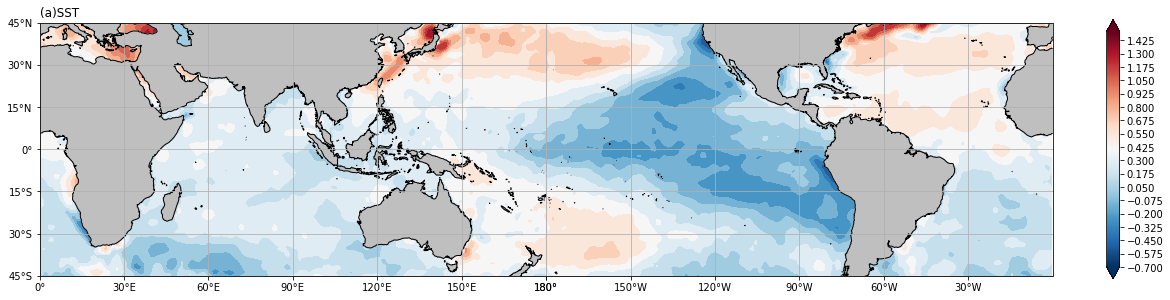

In [3]:
lon = longitude[:].data
lat = latitude[44:136].data
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff.max(), diff.min())

fig = plt.figure(figsize=(15,5))

proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (-180,181, -45,45)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

# fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre,
#                  # 显著性打点 p值为0.05
#                 [np.nanmin(diff_pacific_contre), 0.05, np.nanmax(diff_pacific_contre)],
#     #                  [0.01, 0.05, np.nanmax(p_value)],
#                 hatches=['///', None], colors="none",
#                 transform = ccrs.PlateCarree())  # 增加斜线

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(a)SST',loc='left',fontsize =12)
# fig_ax1.contourf(lon, lat, diff, 
#                 levels=bins, 
# #                 color=['blue','red','yellow','black'],
# #                 hatches='///',
#                 transform=cartopy.crs.PlateCarree(),
#                cmap=plt.cm.RdBu_r)
cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(-0.70,1.51,0.125),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

norm = colors.Normalize(vmin=-0.70, vmax=1.51)    #确定colormap的最大最小值

# cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-1.25,1.25,8))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(-0.70,1.51,0.125).tolist(),                                                    
                 extend='both',
                fraction=0.012) 

# plt.colorbar(cont,fraction=0.012)

plt.savefig("sst_diffCheck.png",dpi=300,bbox_inches='tight')
plt.show()

In [51]:

year_1982to1997 = np.transpose(sst[1343:1535], [1, 2, 0])

year_1998to2022 = np.transpose(sst[1535:1823], [1, 2, 0])


In [55]:
year_1982to1997.shape

(180, 360, 192)

In [62]:
from scipy import stats
# t-test 测试
ttest_t_value = np.zeros((180,360), dtype=float, order='C')
ttest_pval = np.zeros((180,360), dtype=float, order='C')
for row in range(year_1982to1997.shape[0]):
    for col in range(year_1982to1997.shape[1]):
        tmp1 = year_1982to1997[row][col]
        tmp2 = year_1998to2022[row][col]
        t_tmp, pval_tmp = stats.ttest_ind(tmp1, tmp2)
        ttest_t_value[row][col] = t_tmp
        ttest_pval[row][col] = pval_tmp
        


/home/lk/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [88]:
a = ttest_t_value[44:136]

a[:1,:]

array([[-1.30701320e+00, -1.27728068e+00, -1.34450113e+00,
        -1.34393439e+00, -1.27805354e+00, -1.23372728e+00,
        -1.20782325e+00, -1.16449947e+00, -1.10665177e+00,
        -1.02054151e+00, -9.03750844e-01, -8.21934504e-01,
        -7.76726855e-01, -7.83057793e-01, -8.39789280e-01,
        -8.05029274e-01, -6.80748841e-01, -5.80359595e-01,
        -5.04000902e-01, -4.34790873e-01, -3.72525501e-01,
        -3.59909849e-01, -3.95888080e-01, -4.26975508e-01,
        -4.53566405e-01, -4.73616551e-01, -4.87016078e-01,
        -4.99572654e-01, -5.11685900e-01, -4.56228650e-01,
        -3.30987148e-01, -2.52926478e-01, -2.23194065e-01,
        -2.01935061e-01, -1.89567311e-01, -1.61279521e-01,
        -1.17211899e-01, -1.00278017e-01, -1.10581336e-01,
        -1.28831558e-01, -1.55264502e-01, -1.13246193e-01,
        -1.03541725e-03,  4.28106801e-02,  1.69907310e-02,
        -2.25369870e-02, -7.53410875e-02, -1.49486880e-01,
        -2.45179166e-01, -3.02464429e-01, -3.19510687e-0

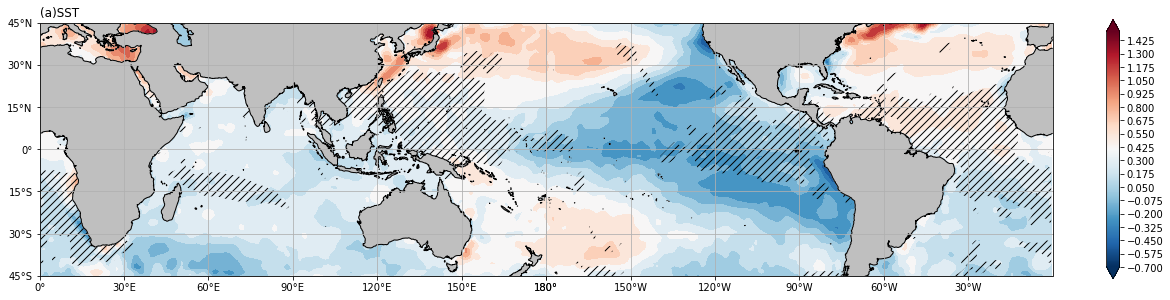

In [69]:
lon = longitude[:].data
lat = latitude[44:136].data
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
    
fig = plt.figure(figsize=(15,5))

proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (-180,181, -45,45)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

t_point_value = ttest_t_value[44:136]
p_point_value = ttest_pval[44:136]
fig_ax1.contourf(lon_pacific, lat, p_point_value,
                 # 显著性打点 p值为0.05
                [np.nanmin(p_point_value), 0.02, np.nanmax(p_point_value)],
    #                  [0.01, 0.05, np.nanmax(p_value)],
                hatches=['///', None], colors="none",
                transform = ccrs.PlateCarree())  # 增加斜线

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(a)SST',loc='left',fontsize =12)
# fig_ax1.contourf(lon, lat, diff, 
#                 levels=bins, 
# #                 color=['blue','red','yellow','black'],
# #                 hatches='///',
#                 transform=cartopy.crs.PlateCarree(),
#                cmap=plt.cm.RdBu_r)
cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(-0.70,1.51,0.125),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

norm = colors.Normalize(vmin=-0.70, vmax=1.51)    #确定colormap的最大最小值

# cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-1.25,1.25,8))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(-0.70,1.51,0.125).tolist(),                                                    
                 extend='both',
                fraction=0.012) 

# plt.colorbar(cont,fraction=0.012)

plt.savefig("sst_diffCheck_p.png",dpi=300,bbox_inches='tight')
# plt.savefig("sst_diffCheck_t.png",dpi=300,bbox_inches='tight')

plt.show()

1.4641342692905006 -0.6092177894380377


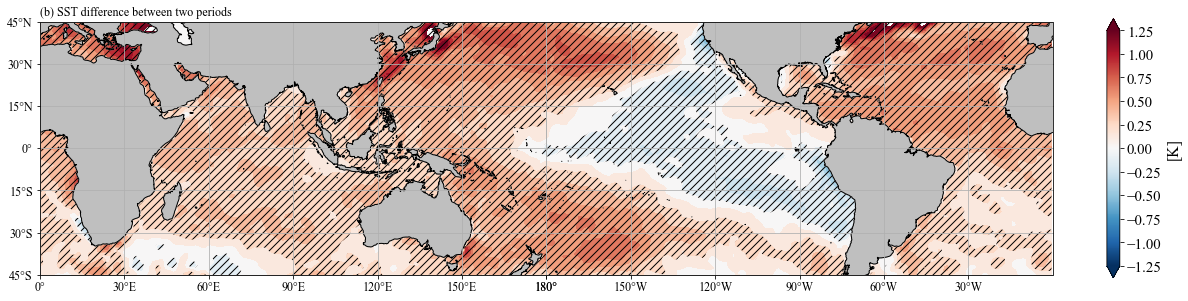

In [33]:
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

# 选择区间为[-1.25, 1.25]
lon = longitude[:].data
lat = latitude[44:136].data
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())
def choose_95_percent(amax, amin):
    # 去掉中间 5%的部分
    middle = (np.abs(amax) + np.abs(amin)) * 0.5
    tmp = middle * 0.9
    bmax = amax - tmp
    bmin = amax - middle - bmax
    return round(bmax, 2), round(bmin,2)

point_max, point_min = choose_95_percent(1.25, -1.25)
    

fig = plt.figure(figsize=(15,5))


proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (-180,181, -45,45)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre,
                 # 显著性打点 p值为0.05
                [point_max, np.nanmax(diff_pacific_contre)],
    #                  [0.01, 0.05, np.nanmax(p_value)],
                hatches=['///', None], colors="none",
                transform = ccrs.PlateCarree())  # 增加斜线

fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre,
                 # 显著性打点 p值为0.05
                [np.nanmin(diff_pacific_contre),point_min],
    #                  [0.01, 0.05, np.nanmax(p_value)],
                hatches=['///', None], colors="none",
                transform = ccrs.PlateCarree())  # 增加斜线

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', 
                                    facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
labels = fig_ax1.get_xticklabels() + fig_ax1.get_yticklabels()
[label.set_fontproperties(FontProperties(fname="./font/times.ttf",size=12)) for label in labels]


fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

font_S = fm.FontProperties(family='Times New Roman', stretch=0)

fig_ax1.set_title('(b) SST difference between two periods',loc='left',fontsize =12,
                 fontproperties = font_S)
# fig_ax1.contourf(lon, lat, diff, 
#                 levels=bins, 
# #                 color=['blue','red','yellow','black'],
# #                 hatches='///',
#                 transform=cartopy.crs.PlateCarree(),
#                cmap=plt.cm.RdBu_r)
cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(-1.25,1.25,0.125),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

norm = colors.Normalize(vmin=-1.25, vmax=1.25)    #确定colormap的最大最小值

# cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-1.25,1.25,8))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(-1.25,1.26,0.25).tolist(),                                                    
                 extend='both',
                fraction=0.012) 

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 16,
        }
fc1.set_label(label="[K]", fontdict=font) #设置colorbar的标签字体及其大小

# plt.colorbar(cont,fraction=0.012)

plt.savefig("diffCheck_sst_Red.png",dpi=300,bbox_inches='tight')
plt.show()

1.4641342692905006 -0.6092177894380377


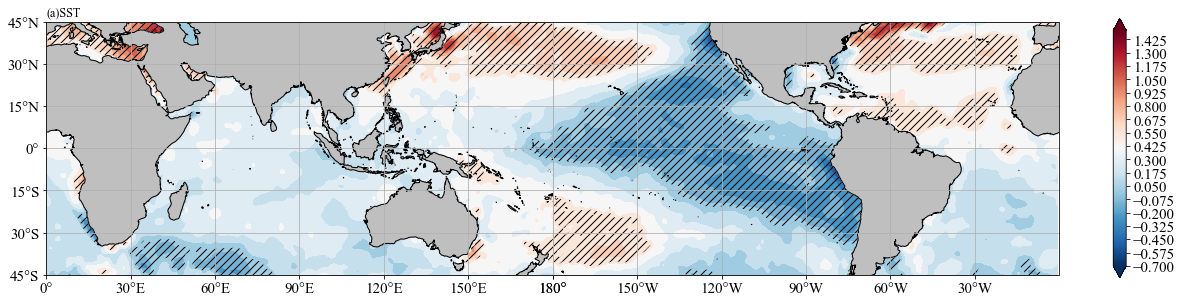

In [30]:
lon = longitude[:].data
lat = latitude[44:136].data
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())
def choose_95_percent(amax, amin):
    # 去掉中间 5%的部分
    middle = (np.abs(amax) + np.abs(amin)) * 0.5
    tmp = middle * 0.975
    bmax = amax - tmp
    bmin = amax - middle - bmax
    return round(bmax, 2), round(bmin,2)

point_max, point_min = choose_95_percent(diff_pacific_contre.max(),
                                         diff_pacific_contre.min())
    
fig = plt.figure(figsize=(15,5))

proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (-180,181, -45,45)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre,
                 # 显著性打点 p值为0.05
                [point_max, np.nanmax(diff_pacific_contre)],
    #                  [0.01, 0.05, np.nanmax(p_value)],
                hatches=['///', None], colors="none",
                transform = ccrs.PlateCarree())  # 增加斜线

fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre,
                 # 显著性打点 p值为0.05
                [np.nanmin(diff_pacific_contre), point_min],
    #                  [0.01, 0.05, np.nanmax(p_value)],
                hatches=['///', None], colors="none",
                transform = ccrs.PlateCarree())  # 增加斜线

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(a)SST',loc='left',fontsize =12)
# fig_ax1.contourf(lon, lat, diff, 
#                 levels=bins, 
# #                 color=['blue','red','yellow','black'],
# #                 hatches='///',
#                 transform=cartopy.crs.PlateCarree(),
#                cmap=plt.cm.RdBu_r)
cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(-0.70,1.51,0.125),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

norm = colors.Normalize(vmin=-0.70, vmax=1.51)    #确定colormap的最大最小值

# cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-1.25,1.25,8))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(-0.70,1.51,0.125).tolist(),                                                    
                 extend='both',
                fraction=0.012) 

# plt.colorbar(cont,fraction=0.012)

plt.savefig("sst_diffCheck_p.png",dpi=300,bbox_inches='tight')
# plt.savefig("sst_diffCheck_t.png",dpi=300,bbox_inches='tight')

plt.show()

In [34]:
point_max, point_min

(0.12, -0.12)